# <center> **Performance Benchmarking of Cryptographic Mechanisms**

# <center> ![alt text](sp-1.png)

**In this assignment, we are going to measure the time that AES (symmetric encryption), RSA (asymmetric encryption), and SHA-256 (hashing) take to process files of different sizes, using a Python implementation for the encryption, decryption, and hashing mechanisms.**

**Let´s break down what each one of these mechanisms do:**

**AES (symmetric encryption) - Symmetric encryption is a cryptographic method where the same key is used for both encryption and decryption of data.<br>**
**RSA (asymmetric encryption) - Asymmetric encryption uses a pair of keys: a public key for encryption and a private key for decryption. The public key can be shared openly, while the private key must be kept secure.<br>**
**SHA-256 (hashing) - Hashing is a one-way function that takes an input (or "message") and returns a fixed-size string of bytes**

**The objective of this assignment is to gain practical insight into the behavior of these algorithms. To achieve this, we will generate random data files with specific sizes and run each algorithm to evaluate their performance and efficiency.**

# 1st Step - Install Dependencies

**In this first step we are going to install our dependecies to make our job possible.**

In [15]:
!pip install cryptography matplotlib numpy

# 2nd Step - Import Libraries

**In the second step, we will import the necessary libraries for this assignment. These libraries will allow us to handle cryptographic operations, generate random data, perform timing benchmarks, and create visualizations for our results.**

In [16]:
import os
import timeit
import time
import statistics
import hashlib
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import trapz

from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa

# 3rd Step - Generate Random Data for Files

**Now, we will generate random data for files, which will later be used to measure the execution times of the cryptographic operations.**

In [17]:
# For AES and SHA, file sizes (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152.
# For RSA, file sizes (in bytes): 2, 4, 8, 16, 32, 64, 128.

sizes_aes_sha = [8, 64, 512, 4096, 32768, 262144, 2097152]
sizes_rsa = [2, 4, 8, 16, 32, 64, 128]

# Generate random data for AES and SHA (simulate files)
data_aes_sha = {size: os.urandom(size) for size in sizes_aes_sha}

# Generate random data for RSA (simulate files)
data_rsa = {size: os.urandom(size) for size in sizes_rsa}

# 4th Step - Create a function for plotting

**In this step, we define a function that converts seconds to microseconds (µs), which will be used for plotting the execution times.**

In [18]:
def convert_to_us(time_dict):
    return {k: v * 1e6 for k, v in time_dict.items()}

# 5th Step - AES Encryption/Decryption

**To start, we will focus on AES (Advanced Encryption Standard), implementing both encryption and decryption routines, and measuring their performance across different file sizes**

AES Size       8 bytes: encrypt = 0.000032 sec, decrypt = 0.000024 sec
AES Size      64 bytes: encrypt = 0.000019 sec, decrypt = 0.000017 sec
AES Size     512 bytes: encrypt = 0.000017 sec, decrypt = 0.000017 sec
AES Size    4096 bytes: encrypt = 0.000018 sec, decrypt = 0.000018 sec
AES Size   32768 bytes: encrypt = 0.000023 sec, decrypt = 0.000023 sec
AES Size  262144 bytes: encrypt = 0.000069 sec, decrypt = 0.000071 sec
AES Size 2097152 bytes: encrypt = 0.001857 sec, decrypt = 0.001886 sec

 AES Encryption & Decryption Time Stats 
Metric          Encryption      Decryption
------------------------------------------
Mean              0.000291        0.000294
Median            0.000023        0.000023
StdDev            0.000691        0.000703
Min               0.000017        0.000017
Max               0.001857        0.001886
Range             0.001840        0.001870


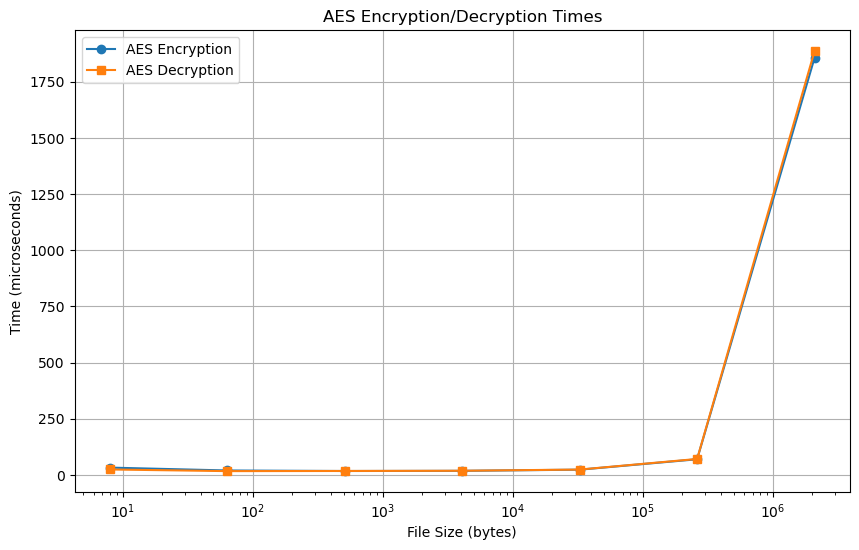

In [19]:
# Generate a random 32 bytes key for AES.
aes_key = os.urandom(32)

# We are going to use CTR mode to avoid padding

def aes_encrypt(data):

    iv = os.urandom(16)  # 16 bytes IV for AES block size
    cipher = Cipher(algorithms.AES(aes_key), modes.CTR(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    return encryptor.update(data) + encryptor.finalize()

def aes_decrypt(ciphertext, iv):

    cipher = Cipher(algorithms.AES(aes_key), modes.CTR(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    return decryptor.update(ciphertext) + decryptor.finalize()

def aes_encrypt_decrypt_time(data, number=100):

    # Encryption timing using new random IV each call
    enc_timer = timeit.Timer(lambda: aes_encrypt(data))
    enc_time = enc_timer.timeit(number=number) / number

    # For decryption, generate ciphertext once
    iv = os.urandom(16)
    cipher = Cipher(algorithms.AES(aes_key), modes.CTR(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(data) + encryptor.finalize()

    dec_timer = timeit.Timer(lambda: aes_decrypt(ciphertext, iv))
    dec_time = dec_timer.timeit(number=number) / number

    return enc_time, dec_time

# Dictionaries to store AES encryption and decryption times
aes_encrypt_times = {}
aes_decrypt_times = {}

# Collect AES timings for encryption and decryption for each file size
for size in sizes_aes_sha:
    enc_time, dec_time = aes_encrypt_decrypt_time(data_aes_sha[size])
    aes_encrypt_times[size] = enc_time
    aes_decrypt_times[size] = dec_time
    print(f"AES Size {size:7d} bytes: encrypt = {enc_time:.6f} sec, decrypt = {dec_time:.6f} sec")

# Stastics Summary

enc_times = list(aes_encrypt_times.values())
dec_times = list(aes_decrypt_times.values())

# Print table header
print("\n AES Encryption & Decryption Time Stats ")
print(f"{'Metric':<10} {'Encryption':>15} {'Decryption':>15}")
print("-" * 42)

# Print stats
print(f"{'Mean':<10} {statistics.mean(enc_times):>15.6f} {statistics.mean(dec_times):>15.6f}")
print(f"{'Median':<10} {statistics.median(enc_times):>15.6f} {statistics.median(dec_times):>15.6f}")
print(f"{'StdDev':<10} {statistics.stdev(enc_times):>15.6f} {statistics.stdev(dec_times):>15.6f}")
print(f"{'Min':<10} {min(enc_times):>15.6f} {min(dec_times):>15.6f}")
print(f"{'Max':<10} {max(enc_times):>15.6f} {max(dec_times):>15.6f}")
print(f"{'Range':<10} {max(enc_times) - min(enc_times):>15.6f} {max(dec_times) - min(dec_times):>15.6f}")

#Create the "AES Encryption/Decryption Times" Plot

aes_encrypt_us = convert_to_us(aes_encrypt_times)
aes_decrypt_us = convert_to_us(aes_decrypt_times)
sizes_aes_sha_sorted = sorted(aes_encrypt_us.keys())

plt.figure(figsize=(10, 6))
plt.plot(sizes_aes_sha_sorted, [aes_encrypt_us[s] for s in sizes_aes_sha_sorted], marker='o', label='AES Encryption')
plt.plot(sizes_aes_sha_sorted, [aes_decrypt_us[s] for s in sizes_aes_sha_sorted], marker='s', label='AES Decryption')
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.title('AES Encryption/Decryption Times')
plt.legend()
plt.grid(True)
plt.show()

# 6th Step - RSA Encryption/Decryption

**Next, we are going to focus on RSA (Rivest–Shamir–Adleman), implementing both encryption and decryption routines, and measuring their performance across different file sizes**

RSA Size   2 bytes: encrypt = 0.000072 sec, decrypt = 0.020492 sec
RSA Size   4 bytes: encrypt = 0.000087 sec, decrypt = 0.019846 sec
RSA Size   8 bytes: encrypt = 0.000082 sec, decrypt = 0.020010 sec
RSA Size  16 bytes: encrypt = 0.000104 sec, decrypt = 0.024284 sec
RSA Size  32 bytes: encrypt = 0.000152 sec, decrypt = 0.025688 sec
RSA Size  64 bytes: encrypt = 0.000138 sec, decrypt = 0.023905 sec
RSA Size 128 bytes: encrypt = 0.000137 sec, decrypt = 0.024397 sec

 RSA Encryption & Decryption Time Stats 
Metric          Encryption      Decryption
------------------------------------------
Mean              0.000110        0.022660
Median            0.000104        0.023905
StdDev            0.000032        0.002450
Min               0.000072        0.019846
Max               0.000152        0.025688
Range             0.000081        0.005842


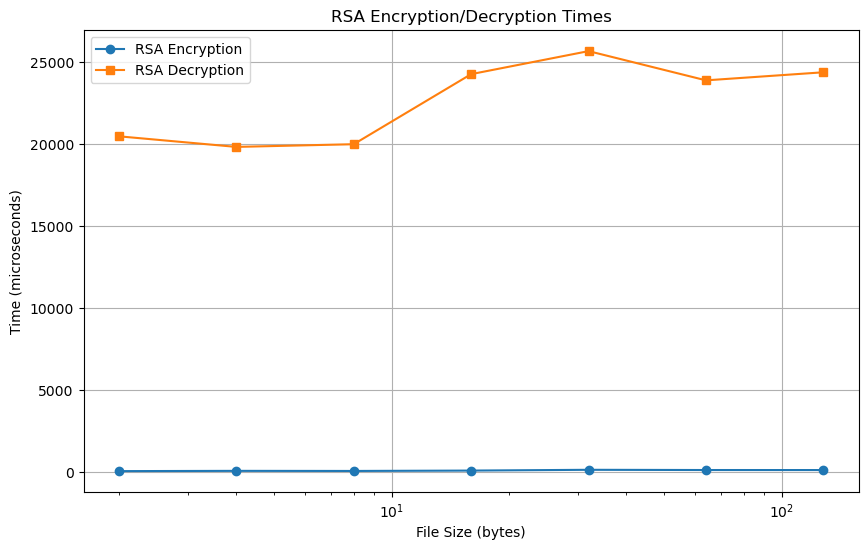

In [20]:
# Generate RSA key pair (2048 bits)
private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
public_numbers = private_key.public_key().public_numbers()
n = public_numbers.n
e = public_numbers.e
d = private_key.private_numbers().d

def rsa_encrypt_raw(data):

    m = int.from_bytes(data, byteorder='big')
    c = pow(m, e, n)
    return c

def rsa_decrypt_raw(ciphertext, size):

    m = pow(ciphertext, d, n)
    return m.to_bytes(size, byteorder='big')

def rsa_encrypt_decrypt_time(data, number=100):

    size = len(data)
    
    # Pre-generate ciphertext for decryption timing
    ciphertext = rsa_encrypt_raw(data)

    enc_timer = timeit.Timer(lambda: rsa_encrypt_raw(data))
    enc_time = enc_timer.timeit(number=number) / number

    dec_timer = timeit.Timer(lambda: rsa_decrypt_raw(ciphertext, size))
    dec_time = dec_timer.timeit(number=number) / number

    return enc_time, dec_time

# Dictionaries to store RSA encryption and decryption times

rsa_encrypt_times = {}
rsa_decrypt_times = {}

# Collect RSA timings for encryption and decryption for each file size
for size in sizes_rsa:
    enc_time, dec_time = rsa_encrypt_decrypt_time(data_rsa[size])
    rsa_encrypt_times[size] = enc_time
    rsa_decrypt_times[size] = dec_time
    print(f"RSA Size {size:3d} bytes: encrypt = {enc_time:.6f} sec, decrypt = {dec_time:.6f} sec")

# Statistical Summary

enc_times = list(rsa_encrypt_times.values())
dec_times = list(rsa_decrypt_times.values())

# Print table header
print("\n RSA Encryption & Decryption Time Stats ")
print(f"{'Metric':<10} {'Encryption':>15} {'Decryption':>15}")
print("-" * 42)

# Print stats
print(f"{'Mean':<10} {statistics.mean(enc_times):>15.6f} {statistics.mean(dec_times):>15.6f}")
print(f"{'Median':<10} {statistics.median(enc_times):>15.6f} {statistics.median(dec_times):>15.6f}")
print(f"{'StdDev':<10} {statistics.stdev(enc_times):>15.6f} {statistics.stdev(dec_times):>15.6f}")
print(f"{'Min':<10} {min(enc_times):>15.6f} {min(dec_times):>15.6f}")
print(f"{'Max':<10} {max(enc_times):>15.6f} {max(dec_times):>15.6f}")
print(f"{'Range':<10} {max(enc_times) - min(enc_times):>15.6f} {max(dec_times) - min(dec_times):>15.6f}")

#Create the "RSA Encryption/Decryption Times" Plot

rsa_encrypt_us = convert_to_us(rsa_encrypt_times)
rsa_decrypt_us = convert_to_us(rsa_decrypt_times)
sizes_rsa_sorted = sorted(rsa_encrypt_us.keys())

plt.figure(figsize=(10, 6))
plt.plot(sizes_rsa_sorted, [rsa_encrypt_us[s] for s in sizes_rsa_sorted], marker='o', label='RSA Encryption')
plt.plot(sizes_rsa_sorted, [rsa_decrypt_us[s] for s in sizes_rsa_sorted], marker='s', label='RSA Decryption')
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.title('RSA Encryption/Decryption Times')
plt.legend()
plt.grid(True)
plt.show()

# 7th Step - SHA-256 Hash Generation

**Finally, we will focus on SHA-256 (Secure Hash Algorithm 256-bit), implementing the hash generation routine and measuring its performance across different file sizes.**

SHA-256 Size       8 bytes: hash time = 0.000001 sec
SHA-256 Size      64 bytes: hash time = 0.000001 sec
SHA-256 Size     512 bytes: hash time = 0.000001 sec
SHA-256 Size    4096 bytes: hash time = 0.000008 sec
SHA-256 Size   32768 bytes: hash time = 0.000018 sec
SHA-256 Size  262144 bytes: hash time = 0.000141 sec
SHA-256 Size 2097152 bytes: hash time = 0.000951 sec

 SHA-256 Hashing Time Stats 
Metric           Hash Time
---------------------------
Mean              0.000160
Median            0.000008
StdDev            0.000353
Min               0.000001
Max               0.000951
Range             0.000951


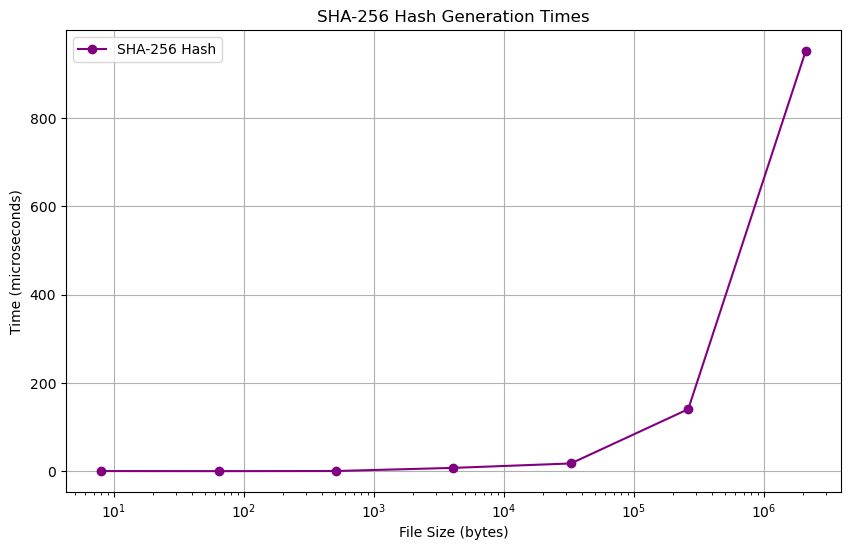

In [21]:
# Function to compute SHA-256 hash of the given data
def sha256_hash(data):

    return hashlib.sha256(data).digest()

# Function to measure average time taken to hash the data using SHA-256
def sha256_time(data, number=100):
 
    timer = timeit.Timer(lambda: sha256_hash(data))
    return timer.timeit(number=number) / number

# Dictionary to store hash times for different file sizes
sha_times = {}

for size in sizes_aes_sha:
    t = sha256_time(data_aes_sha[size])
    sha_times[size] = t
    print(f"SHA-256 Size {size:7d} bytes: hash time = {t:.6f} sec")

# Statistical Summary

times = list(sha_times.values())

# Print table header
print("\n SHA-256 Hashing Time Stats ")
print(f"{'Metric':<10} {'Hash Time':>15}")
print("-" * 27)

# Print stats
print(f"{'Mean':<10} {statistics.mean(times):>15.6f}")
print(f"{'Median':<10} {statistics.median(times):>15.6f}")
print(f"{'StdDev':<10} {statistics.stdev(times):>15.6f}")
print(f"{'Min':<10} {min(times):>15.6f}")
print(f"{'Max':<10} {max(times):>15.6f}")
print(f"{'Range':<10} {max(times) - min(times):>15.6f}")

#Create the "SHA-256 Hash Generation Times" Plot

sha_us = convert_to_us(sha_times)

# Reuse sizes_aes_sha_sorted if SHA times have the same keys as AES

plt.figure(figsize=(10, 6))
plt.plot(sizes_aes_sha_sorted, [sha_us[s] for s in sizes_aes_sha_sorted], marker='o', color='purple', label='SHA-256 Hash')
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.title('SHA-256 Hash Generation Times')
plt.legend()
plt.grid(True)
plt.show()

# 8th Step - Data analysis

**Now, for a better understand of the execution times, we will create a plot to compare the encryption and hashing times across different file sizes.**

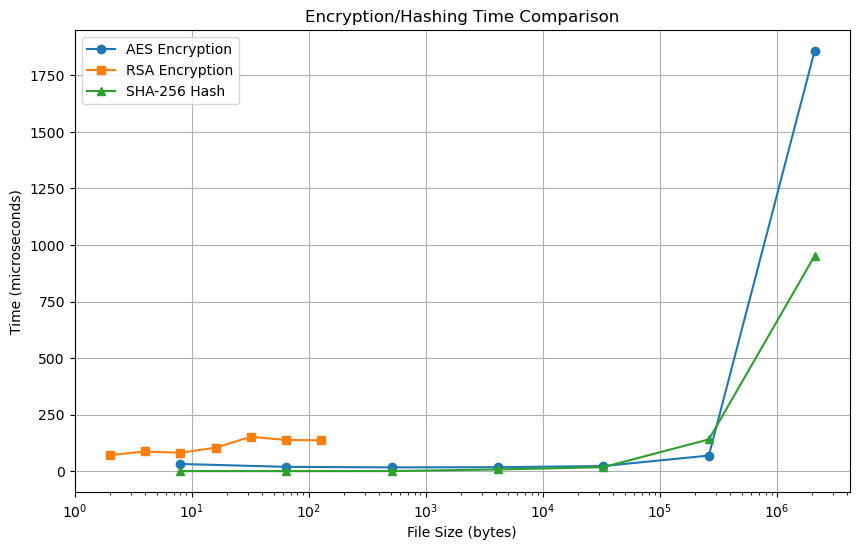

In [22]:
# Create the "Encryption/Hashing Time Comparison" to easier comparision

plt.figure(figsize=(10, 6))

plt.plot(sizes_aes_sha_sorted, [aes_encrypt_us[s] for s in sizes_aes_sha_sorted], marker='o', label='AES Encryption')
plt.plot(sizes_rsa_sorted, [rsa_encrypt_us[s] for s in sizes_rsa_sorted], marker='s', label='RSA Encryption')
plt.plot(sizes_aes_sha_sorted, [sha_us[s] for s in sizes_aes_sha_sorted], marker='^', label='SHA-256 Hash')

plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.title('Encryption/Hashing Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

**We are also going to create a plot for the decryption time comparison between AES and RSA across different file sizes.**

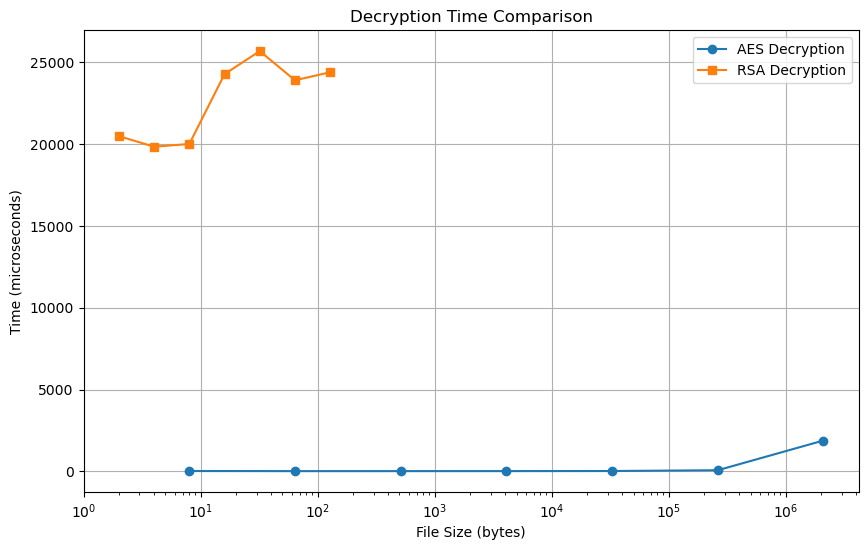

In [23]:
# Create the "Decryption Time Comparison" to easier comparision

plt.figure(figsize=(10, 6))

plt.plot(sizes_aes_sha_sorted, [aes_decrypt_us[s] for s in sizes_aes_sha_sorted], marker='o', label='AES Decryption')
plt.plot(sizes_rsa_sorted, [rsa_decrypt_us[s] for s in sizes_rsa_sorted], marker='s', label='RSA Decryption')

plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.title('Decryption Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 9th Step - Statistical Significance of Timing Measurement

**In this step, we will run the AES, RSA, and SHA-256 algorithms over the same file multiple times and also run them over multiple randomly generated files of fixed size. We will then compare the results to ensure that we obtain statistically significant data for encryption, decryption, and hashing times**

**Starting with AES Encryption Timing: Same vs Random Files, we will create box plots to compare the encryption time for both cases.**

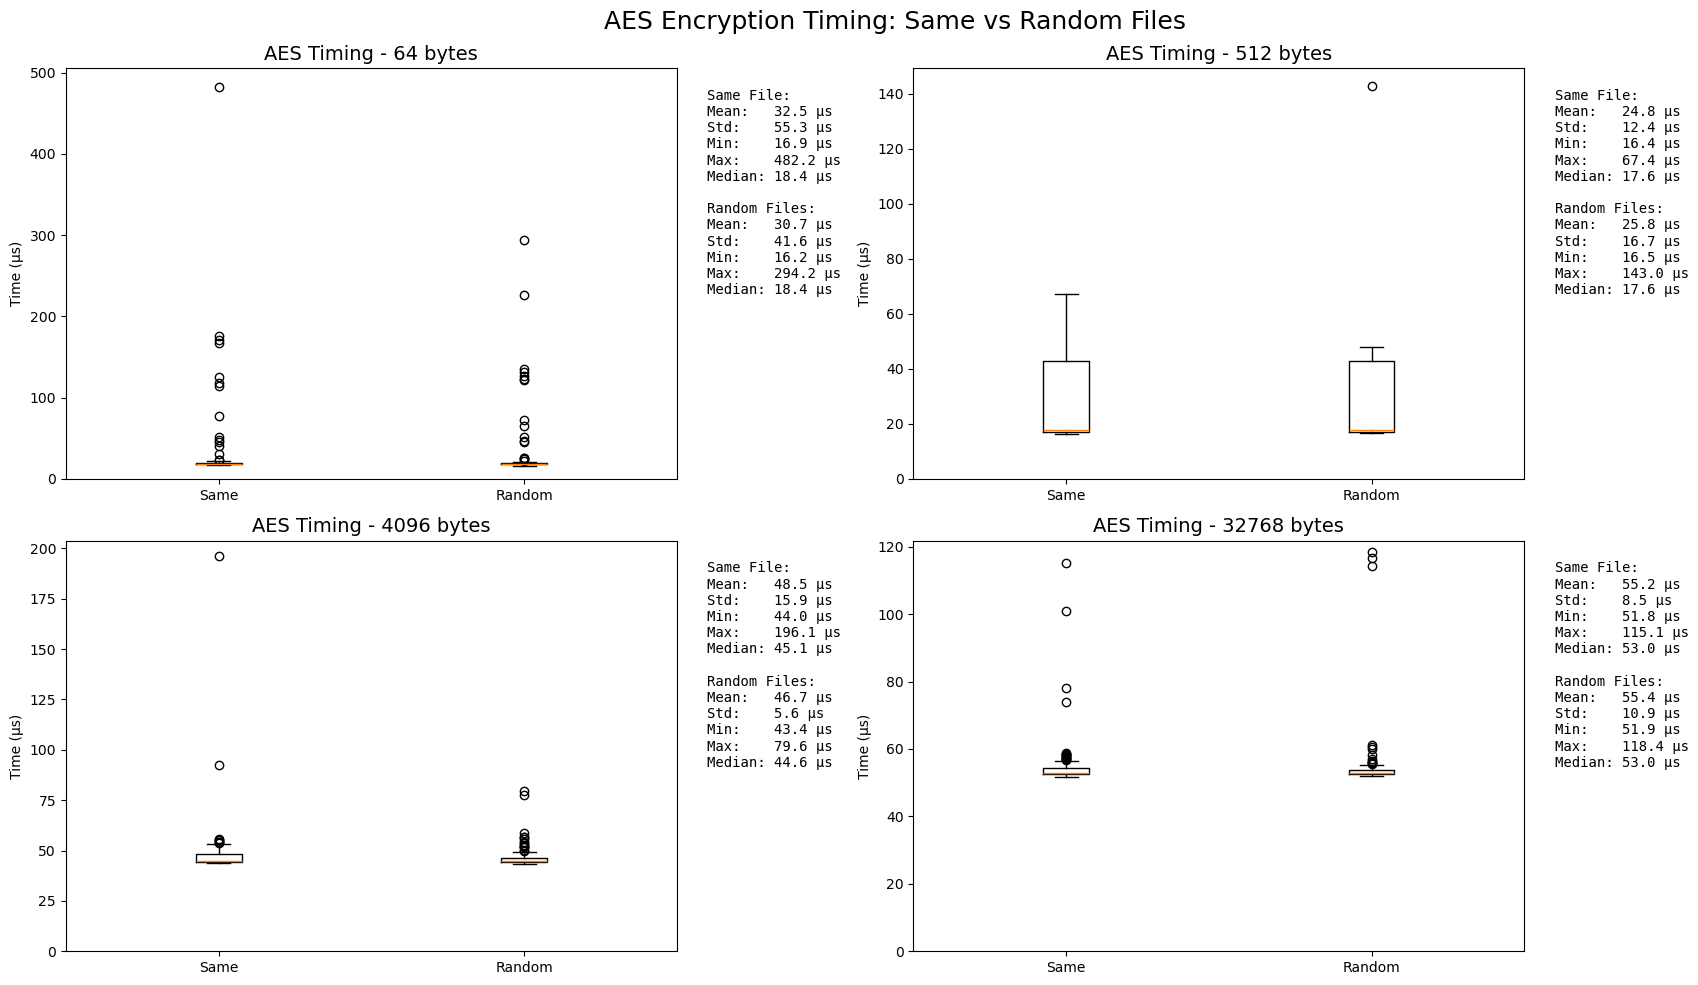

In [24]:
# Benchmark settings
sizes_to_test = [64, 512, 4096, 32768]
iterations = 100
results = {}

# Benchmark loop
for size in sizes_to_test:
    fixed_data = os.urandom(size)
    same_file_times = []
    random_file_times = []

    for _ in range(iterations):
        
        # Same file
        start = time.perf_counter()
        aes_encrypt(fixed_data)
        end = time.perf_counter()
        same_file_times.append((end - start) * 1e6)  # µs

        # Random file
        rand_data = os.urandom(size)
        start = time.perf_counter()
        aes_encrypt(rand_data)
        end = time.perf_counter()
        random_file_times.append((end - start) * 1e6)

    results[size] = {
        'same': same_file_times,
        'random': random_file_times
    }

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for idx, size in enumerate(sizes_to_test):
    ax = axes[idx]
    same = results[size]['same']
    rand = results[size]['random']

    ax.boxplot([same, rand], labels=["Same", "Random"])
    ax.set_title(f"AES Timing - {size} bytes", fontsize=14)
    ax.set_ylabel("Time (µs)")
    ax.set_ylim(bottom=0)

    # Stats 
    def format_stats(data):
        return (
            f"Mean:   {statistics.mean(data):.1f} µs\n"
            f"Std:    {statistics.stdev(data):.1f} µs\n"
            f"Min:    {min(data):.1f} µs\n"
            f"Max:    {max(data):.1f} µs\n"
            f"Median: {statistics.median(data):.1f} µs"
        )

    text_block = (
        "Same File:\n" + format_stats(same) + "\n\n" +
        "Random Files:\n" + format_stats(rand)
    )

    # Formating
    ax.annotate(text_block,
                xy=(1.05, 0.95), xycoords='axes fraction',
                ha='left', va='top',
                fontsize=10, family='monospace')

plt.tight_layout(rect=[0, 0, 0.95, 0.96])
plt.suptitle("AES Encryption Timing: Same vs Random Files", fontsize=18)
plt.show()


**Next, for RSA Encryption Timing: Same vs Random Files, we will create box plots to compare the encryption time for both cases.**

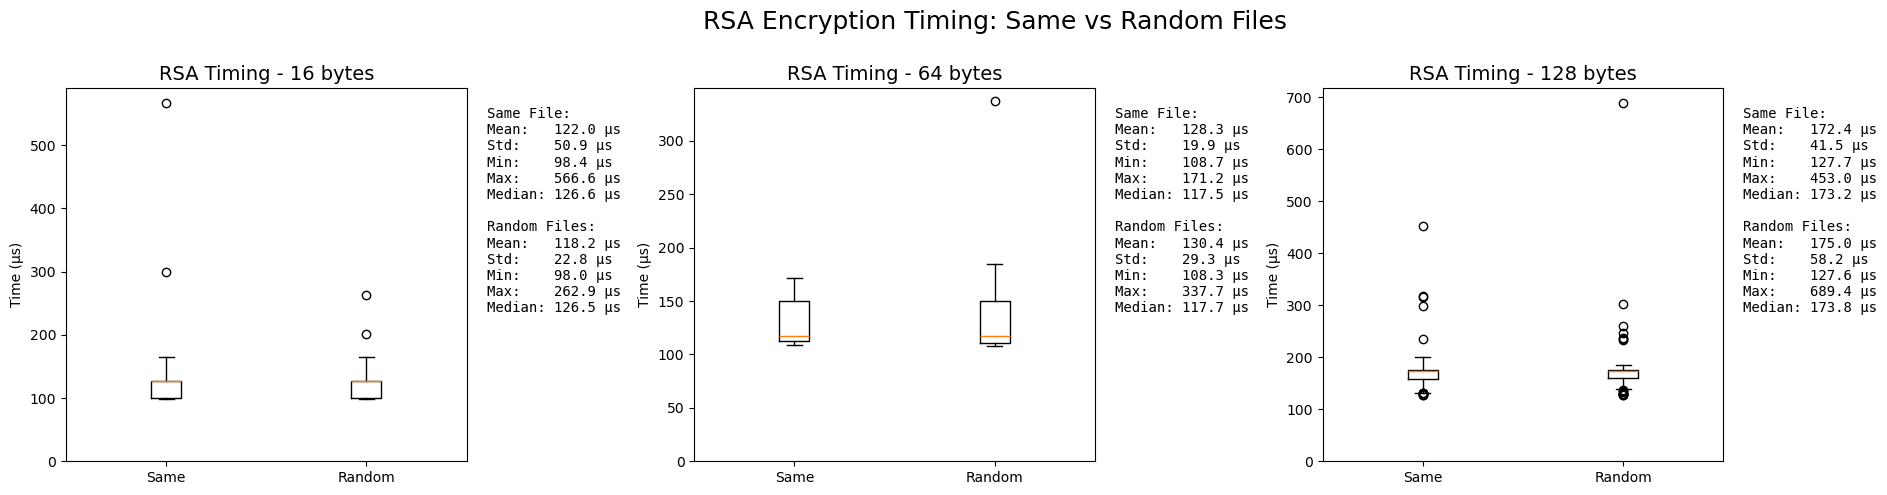

In [25]:
# Benchmark settings
sizes_to_test = [16, 64, 128]
iterations = 100
results = {}

# Benchmark loop
for size in sizes_to_test:
    fixed_data = os.urandom(size)
    same_file_times = []
    random_file_times = []

    for _ in range(iterations):

        # Same file
        start = time.perf_counter()
        rsa_encrypt_raw(fixed_data)
        end = time.perf_counter()
        same_file_times.append((end - start) * 1e6)  # µs

        # Random file
        rand_data = os.urandom(size)
        start = time.perf_counter()
        rsa_encrypt_raw(rand_data)
        end = time.perf_counter()
        random_file_times.append((end - start) * 1e6)

    results[size] = {
        'same': same_file_times,
        'random': random_file_times
    }

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes = axes.flatten()

for idx, size in enumerate(sizes_to_test):
    ax = axes[idx]
    same = results[size]['same']
    rand = results[size]['random']

    ax.boxplot([same, rand], labels=["Same", "Random"])
    ax.set_title(f"RSA Timing - {size} bytes", fontsize=14)
    ax.set_ylabel("Time (µs)")
    ax.set_ylim(bottom=0)

    # Stats 
    def format_stats(data):
        return (
            f"Mean:   {statistics.mean(data):.1f} µs\n"
            f"Std:    {statistics.stdev(data):.1f} µs\n"
            f"Min:    {min(data):.1f} µs\n"
            f"Max:    {max(data):.1f} µs\n"
            f"Median: {statistics.median(data):.1f} µs"
        )

    text_block = (
        "Same File:\n" + format_stats(same) + "\n\n" +
        "Random Files:\n" + format_stats(rand)
    )

    # Formatting
    ax.annotate(text_block,
                xy=(1.05, 0.95), xycoords='axes fraction',
                ha='left', va='top',
                fontsize=10, family='monospace')

plt.tight_layout(rect=[0, 0, 0.95, 0.9])
plt.suptitle("RSA Encryption Timing: Same vs Random Files", fontsize=18)
plt.show()

**Finally, for SHA-256 Hashing Timing: Same vs Random Files, we will again create box plots to compare the hashing time for both cases.**

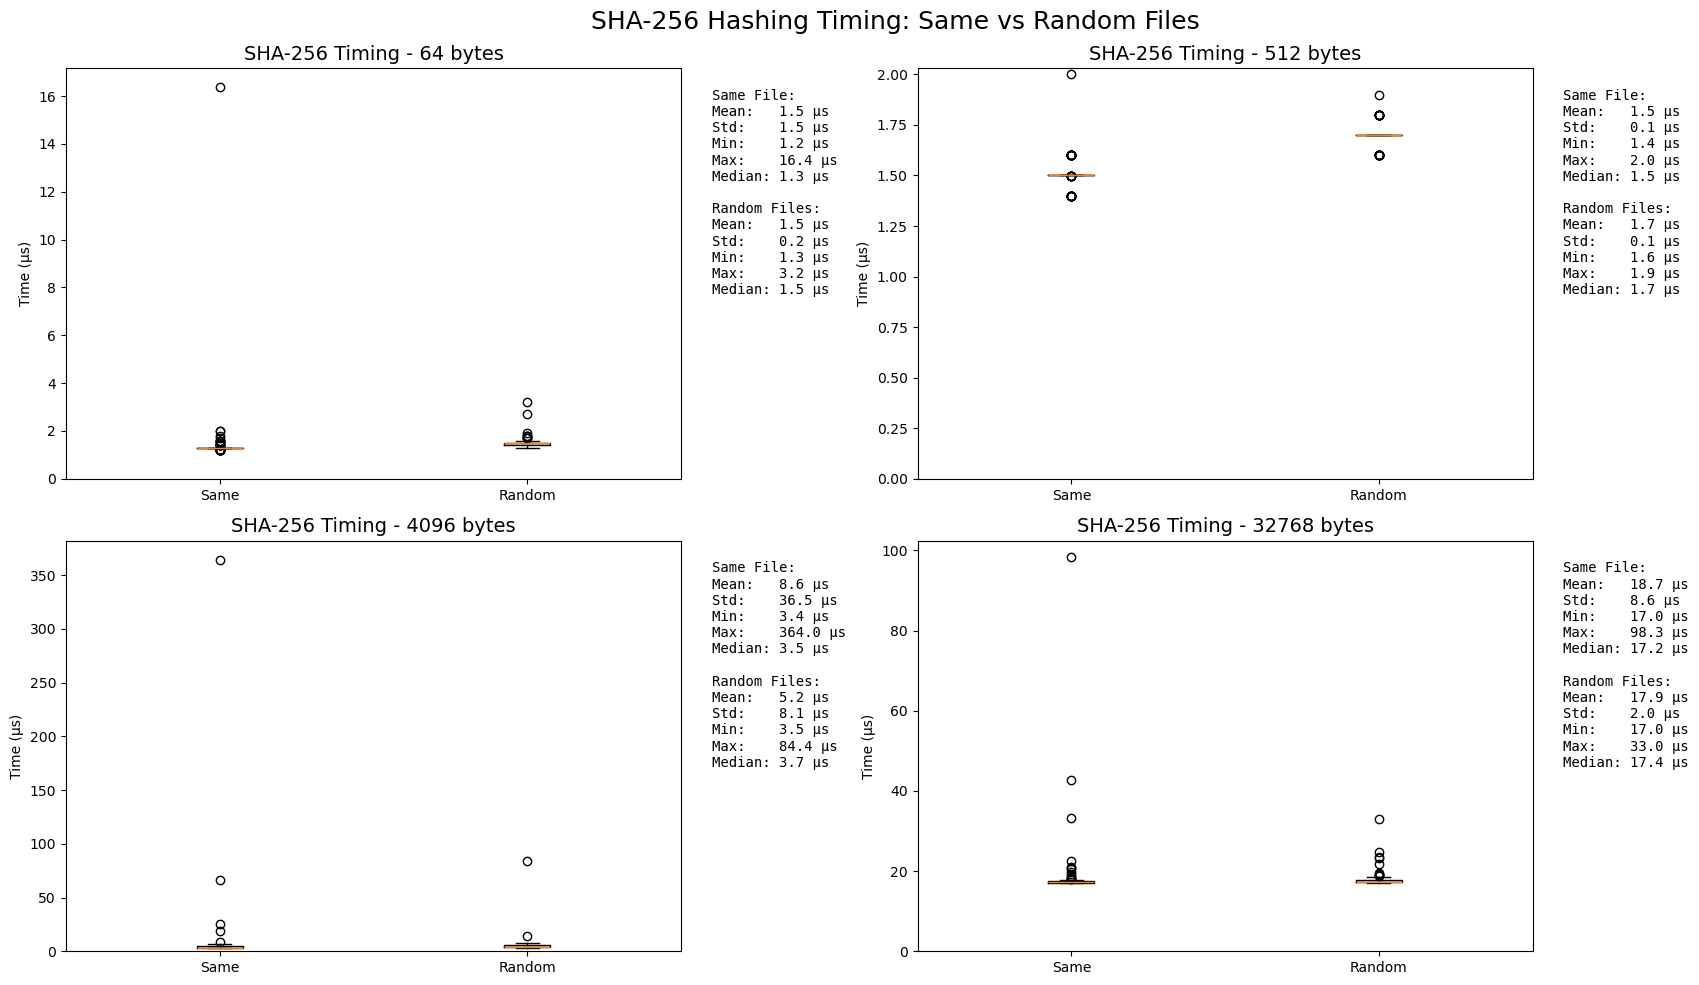

In [26]:
# Benchmark settings
sizes_to_test = [64, 512, 4096, 32768]
iterations = 100
sha_results = {}

def sha256_hash(data):
    return hashlib.sha256(data).digest()

for size in sizes_to_test:
    fixed_data = os.urandom(size)
    same_file_times = []
    random_file_times = []

    for _ in range(iterations):
        # Same file
        start = time.perf_counter()
        sha256_hash(fixed_data)
        end = time.perf_counter()
        same_file_times.append((end - start) * 1e6)  # Convert to µs

        # Random file
        rand_data = os.urandom(size)
        start = time.perf_counter()
        sha256_hash(rand_data)
        end = time.perf_counter()
        random_file_times.append((end - start) * 1e6)

    sha_results[size] = {
        'same': same_file_times,
        'random': random_file_times
    }

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for idx, size in enumerate(sizes_to_test):
    ax = axes[idx]
    same = sha_results[size]['same']
    rand = sha_results[size]['random']

    ax.boxplot([same, rand], labels=["Same", "Random"])
    ax.set_title(f"SHA-256 Timing - {size} bytes", fontsize=14)
    ax.set_ylabel("Time (µs)")
    ax.set_ylim(bottom=0)

    def format_stats(data):
        return (
            f"Mean:   {statistics.mean(data):.1f} µs\n"
            f"Std:    {statistics.stdev(data):.1f} µs\n"
            f"Min:    {min(data):.1f} µs\n"
            f"Max:    {max(data):.1f} µs\n"
            f"Median: {statistics.median(data):.1f} µs"
        )

    text_block = (
        "Same File:\n" + format_stats(same) + "\n\n" +
        "Random Files:\n" + format_stats(rand)
    )

    ax.annotate(text_block,
                xy=(1.05, 0.95), xycoords='axes fraction',
                ha='left', va='top',
                fontsize=10, family='monospace')

plt.tight_layout(rect=[0, 0, 0.95, 0.96])
plt.suptitle("SHA-256 Hashing Timing: Same vs Random Files", fontsize=18)
plt.show()

**We are also going to create box plots for AES Decryption Timing: Same vs Random Files, comparing the decryption times.**

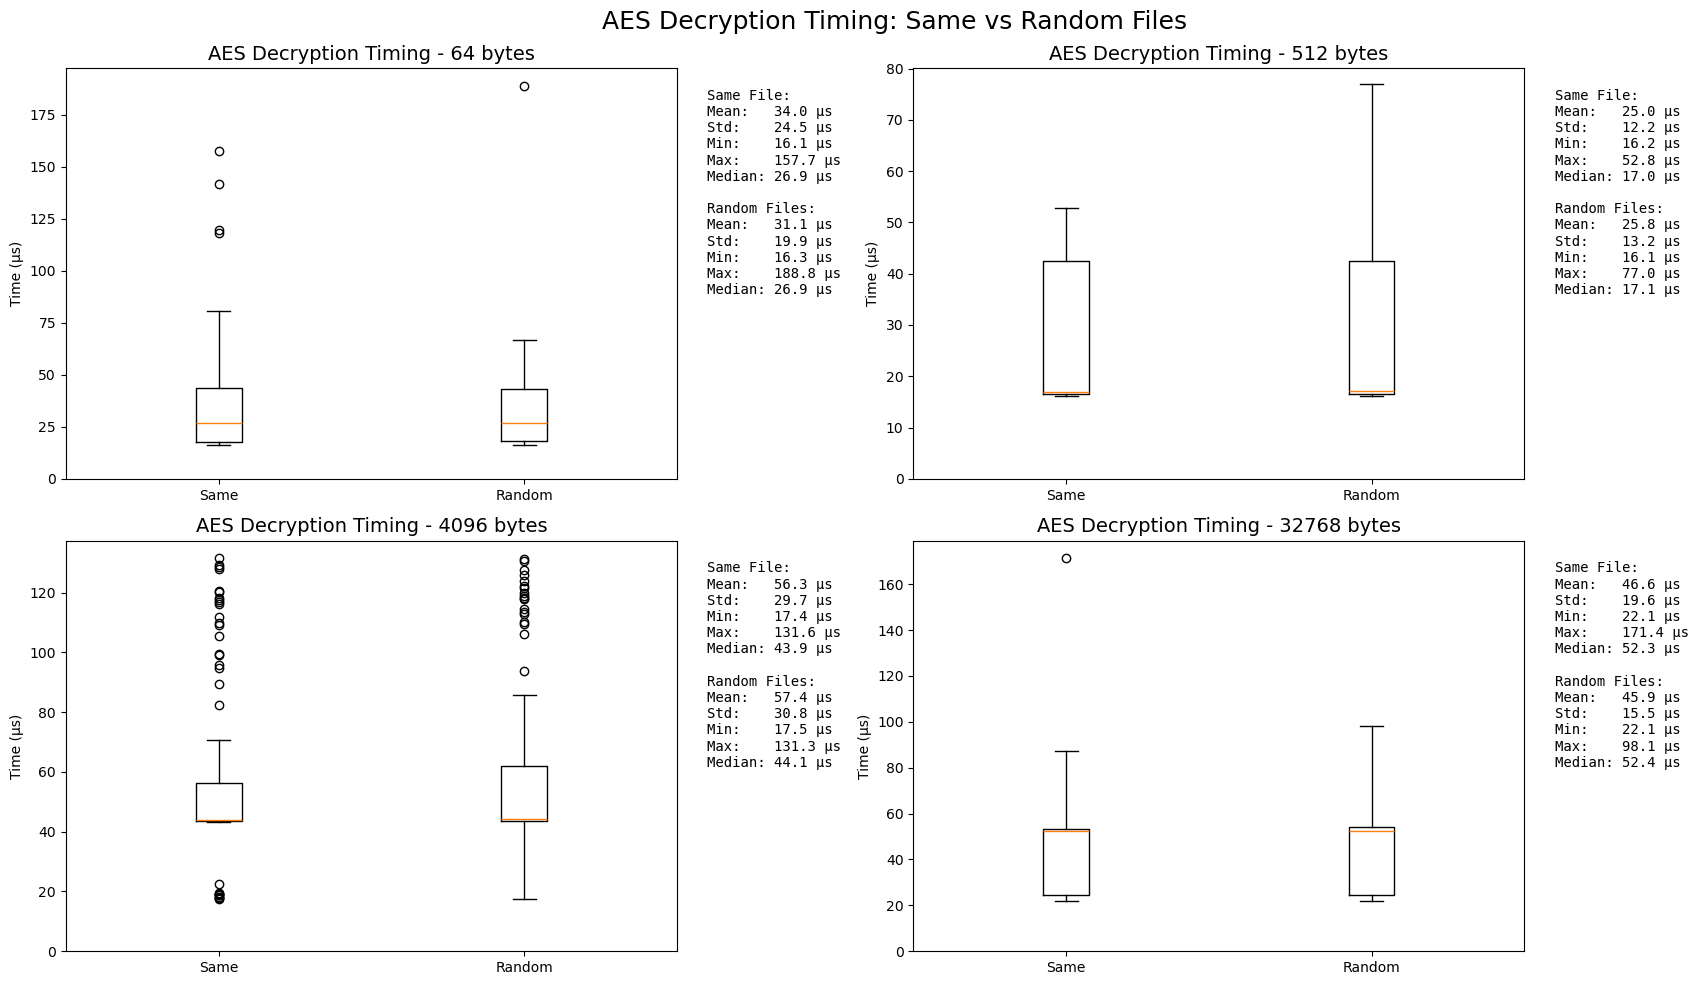

In [27]:
# Benchmark settings
sizes_to_test = [64, 512, 4096, 32768]
iterations = 100
results = {}

# Benchmark loop
for size in sizes_to_test:
    fixed_data = os.urandom(size)
    fixed_iv = os.urandom(16)
    fixed_cipher = aes_encrypt(fixed_data)  # We'll reuse this

    same_file_times = []
    random_file_times = []

    for _ in range(iterations):
        # Same file
        start = time.perf_counter()
        aes_decrypt(fixed_cipher, fixed_iv)
        end = time.perf_counter()
        same_file_times.append((end - start) * 1e6)  # µs

        # Random file
        rand_data = os.urandom(size)
        rand_iv = os.urandom(16)
        rand_cipher = aes_encrypt(rand_data)
        start = time.perf_counter()
        aes_decrypt(rand_cipher, rand_iv)
        end = time.perf_counter()
        random_file_times.append((end - start) * 1e6)

    results[size] = {
        'same': same_file_times,
        'random': random_file_times
    }

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for idx, size in enumerate(sizes_to_test):
    ax = axes[idx]
    same = results[size]['same']
    rand = results[size]['random']

    ax.boxplot([same, rand], labels=["Same", "Random"])
    ax.set_title(f"AES Decryption Timing - {size} bytes", fontsize=14)
    ax.set_ylabel("Time (µs)")
    ax.set_ylim(bottom=0)

    # Stats 
    def format_stats(data):
        return (
            f"Mean:   {statistics.mean(data):.1f} µs\n"
            f"Std:    {statistics.stdev(data):.1f} µs\n"
            f"Min:    {min(data):.1f} µs\n"
            f"Max:    {max(data):.1f} µs\n"
            f"Median: {statistics.median(data):.1f} µs"
        )

    text_block = (
        "Same File:\n" + format_stats(same) + "\n\n" +
        "Random Files:\n" + format_stats(rand)
    )

    # Formating
    ax.annotate(text_block,
                xy=(1.05, 0.95), xycoords='axes fraction',
                ha='left', va='top',
                fontsize=10, family='monospace')

plt.tight_layout(rect=[0, 0, 0.95, 0.96])
plt.suptitle("AES Decryption Timing: Same vs Random Files", fontsize=18)
plt.show()

**We will end this step by creating box plots for RSA Decryption Timing: Same vs Random Files.**

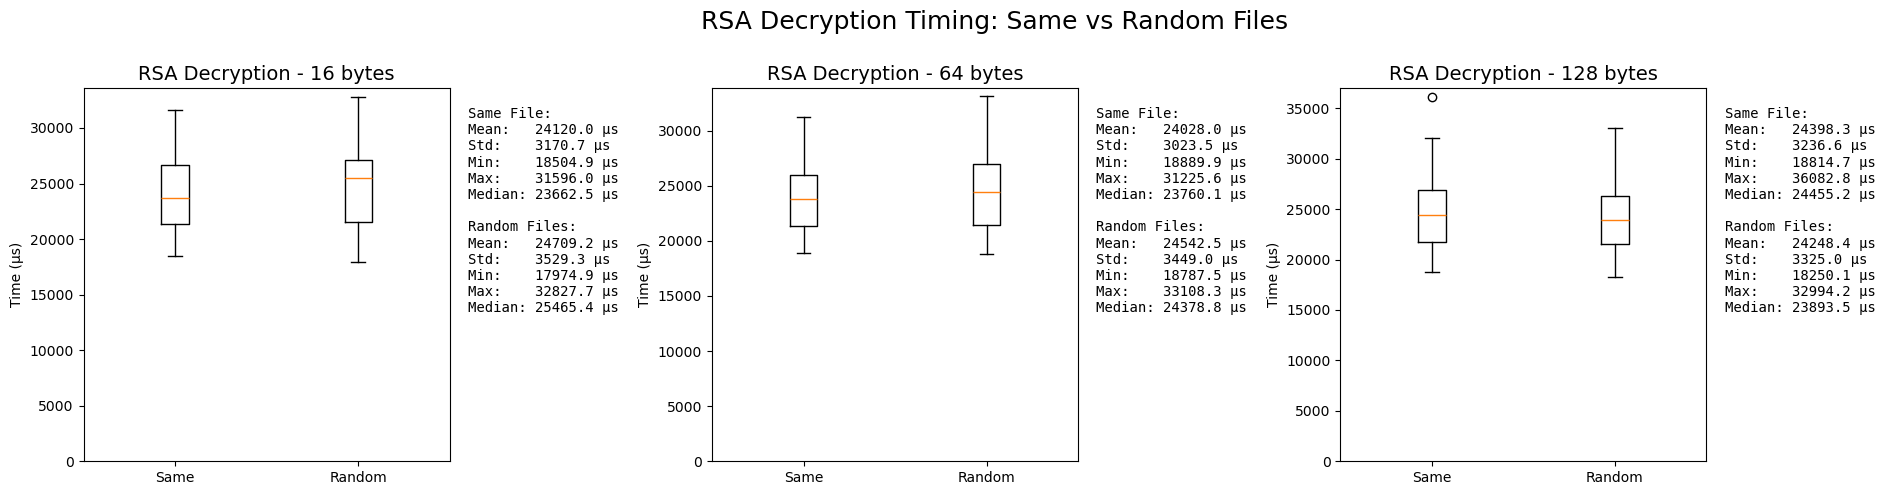

In [28]:
# Benchmark settings
sizes_to_test = [16, 64, 128]
iterations = 100
results = {}

# Benchmark loop
for size in sizes_to_test:
    fixed_data = os.urandom(size)
    fixed_cipher = rsa_encrypt_raw(fixed_data)
    same_file_times = []
    random_file_times = []

    for _ in range(iterations):
        # Same file
        start = time.perf_counter()
        rsa_decrypt_raw(fixed_cipher, size)
        end = time.perf_counter()
        same_file_times.append((end - start) * 1e6)  # µs

        # Random file
        rand_data = os.urandom(size)
        rand_cipher = rsa_encrypt_raw(rand_data)
        start = time.perf_counter()
        rsa_decrypt_raw(rand_cipher, size)
        end = time.perf_counter()
        random_file_times.append((end - start) * 1e6)

    results[size] = {
        'same': same_file_times,
        'random': random_file_times
    }

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes = axes.flatten()

for idx, size in enumerate(sizes_to_test):
    ax = axes[idx]
    same = results[size]['same']
    rand = results[size]['random']

    ax.boxplot([same, rand], labels=["Same", "Random"])
    ax.set_title(f"RSA Decryption - {size} bytes", fontsize=14)
    ax.set_ylabel("Time (µs)")
    ax.set_ylim(bottom=0)

    # Stats
    def format_stats(data):
        return (
            f"Mean:   {statistics.mean(data):.1f} µs\n"
            f"Std:    {statistics.stdev(data):.1f} µs\n"
            f"Min:    {min(data):.1f} µs\n"
            f"Max:    {max(data):.1f} µs\n"
            f"Median: {statistics.median(data):.1f} µs"
        )

    text_block = (
        "Same File:\n" + format_stats(same) + "\n\n" +
        "Random Files:\n" + format_stats(rand)
    )

    # Formatting
    ax.annotate(text_block,
                xy=(1.05, 0.95), xycoords='axes fraction',
                ha='left', va='top',
                fontsize=10, family='monospace')

plt.tight_layout(rect=[0, 0, 0.95, 0.9])
plt.suptitle("RSA Decryption Timing: Same vs Random Files", fontsize=18)
plt.show()


# 10th Step - Conclusion

**The results clearly show that AES is the most efficient algorithm among those evaluated, both
for encryption and decryption, especially for larger files. Execution time increased almost
linearly with file size, remaining significantly lower than for RSA and comparable to SHA-256 for
small files.**

**On the other hand, RSA proved to be considerably slower, especially during the decryption
process using 2048-bit keys, which involved computationally intensive operations. The
difference between RSA encryption and decryption was notable: while encryption remained
relatively stable (~100-175 μs), decryption ranged between 20,000 and 26,000 μs, as expected
from the nature of asymmetric algorithms.**

**SHA-256, in contrast, demonstrated extremely fast and consistent performance. Hashing times
were very low, even for large files (~951 μs for 2 MB), making it the lightest method
computationally, although it performs digest generation rather than encryption.**

**The timing variation between identical and random files of the same size was minimal in most
tests, confirming the robustness of these algorithms against the nature of the input data.
However, higher statistical dispersion was observed for small files (e.g., 64 bytes) and
particularly in RSA decryption, where the standard deviation exceeded 3000 μs. These
deviations are attributable to internal operating system factors and resource handling, such as
CPU caching and memory allocation.**

**It is essential to note that the measured times may vary significantly depending on the system
used, due to differences in:<br>**

**- CPU (number of cores, frequency);<br>**
**- RAM (amount and speed);<br>**
**- Operating system (scheduler, process management);<br>**
**- Python and cryptography library versions.<br>**

**Although absolute times may differ across systems, the relative performance trends between
algorithms remain valid on any modern system.**